In [2]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("IMDB-Movie-Data.csv")

In [6]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
#as we can see here there are some null values in Revenue and Metascore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [8]:
df["Director"].value_counts()
#below are the number of films a director has directed

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64

In [9]:
df["Director"].value_counts()
#number of films every director directed

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64

In [10]:
#actors who acted in films from 2006 to 2016
df["Actors"].unique()

array(['Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana',
       'Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron',
       'James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula',
       'Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson',
       'Will Smith, Jared Leto, Margot Robbie, Viola Davis',
       'Matt Damon, Tian Jing, Willem Dafoe, Andy Lau',
       'Ryan Gosling, Emma Stone, Rosemarie DeWitt, J.K. Simmons',
       'Essie Davis, Andrea Riseborough, Julian Barratt,Kenneth Branagh',
       'Charlie Hunnam, Robert Pattinson, Sienna Miller, Tom Holland',
       'Jennifer Lawrence, Chris Pratt, Michael Sheen,Laurence Fishburne',
       'Eddie Redmayne, Katherine Waterston, Alison Sudol,Dan Fogler',
       'Taraji P. Henson, Octavia Spencer, Janelle Monáe,Kevin Costner',
       'Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen',
       "Auli'i Cravalho, Dwayne Johnson, Rachel House, Temuera Morrison",
       'Anne

In [11]:
#filling the revenue of films based on number of votes , the average of the divison of revenue and votes is 0.0006
df["Revenue (Millions)"].fillna(df["Votes"]*(0.0006),inplace=True)

In [12]:
#as metascore is related to rating and as we can see mostly metascore is always almost equal to 8.5 times of rating
df["Metascore"].fillna(df["Rating"]*8.5,inplace=True)

In [13]:
#each director and sum of revenues of all their movies
df.groupby("Director")["Revenue (Millions)"].sum()

Director
Aamir Khan               1.2000
Abdellatif Kechiche      2.2000
Adam Leon                0.6186
Adam McKay             438.1400
Adam Shankman          157.3300
                         ...   
Xavier Dolan             9.8848
Yimou Zhang             45.1300
Yorgos Lanthimos         8.8100
Zack Snyder            975.7400
Zackary Adler            6.5300
Name: Revenue (Millions), Length: 644, dtype: float64

In [14]:
#these are the films with highest revenue in each year
df_max_revenue = df.groupby("Year")["Revenue (Millions)"].max()
df_max_revenue = df[df["Revenue (Millions)"].isin(df_max_revenue.values)].sort_values(by="Year")
df_max_revenue[['Year','Title','Revenue (Millions)']].reset_index(drop=True)

,Year,Title,Revenue (Millions)
0,2006,Pirates of the Caribbean: Dead Man's Chest,423.03
1,2007,Spider-Man 3,336.53
2,2008,The Dark Knight,533.32
3,2009,Avatar,760.51
4,2010,Toy Story 3,414.98
5,2011,Harry Potter and the Deathly Hallows: Part 2,380.96
6,2012,The Avengers,623.28
7,2013,The Hunger Games: Catching Fire,424.65
8,2014,American Sniper,350.12
9,2015,Star Wars: Episode VII - The Force Awakens,936.63


<AxesSubplot: >

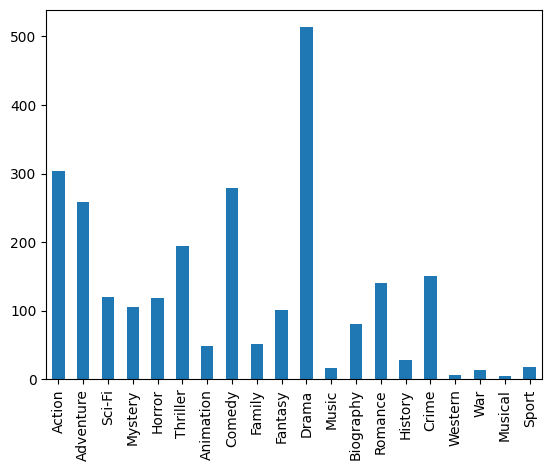

In [15]:
#number of movies in each genre from 2006 to 2016
allgenre = []
for i in df["Genre"]:
    temp = i.split(",")
    for j in temp:
        if j not in allgenre:
            allgenre.append(j)
genre_series = pd.Series([0]*len(allgenre),index=allgenre)
for i in df["Genre"]:
    temp = i.split(",")
    for j in temp:
        genre_series[j]+=1
genre_series.plot.bar()


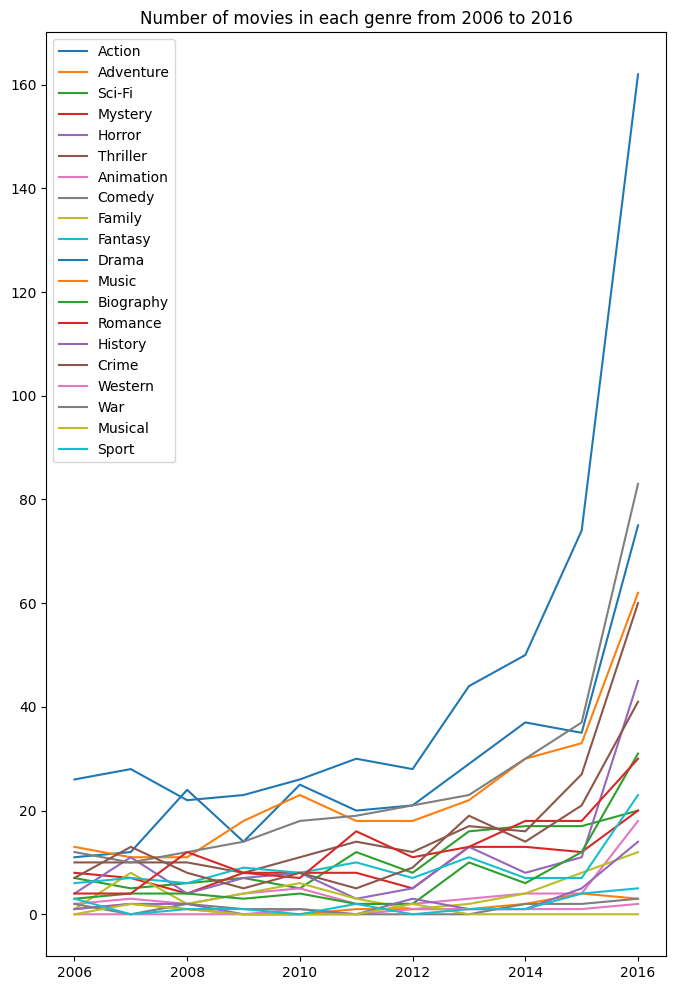

In [34]:
#number of films in each genre in each year
years = df["Year"].unique()
years.sort()
genre_each = pd.DataFrame({"years" :years}).set_index("years")
for x,y in zip(df["Year"],df["Genre"]):
    temp = y.split(",")
    for j in temp:
        if j not in genre_each.columns:
            genre_each[j] = 0
        genre_each.loc[x,j]+=1
plt.figure(figsize=(8,12))
for i in genre_each.columns:
    plt.plot(years,genre_each[i],label = i)
    plt.legend()
plt.title("Number of movies in each genre from 2006 to 2016")
plt.show()

In [57]:
#top 20 actors from 2006 to 2016 and number of films they did in each year
actors = pd.Series()
for i in df["Actors"]:
    temp = i.split(",")
    for j in temp:
        if j not in actors.index:
            actors[j] = 0
        actors[j] +=1
tem =actors.sort_values(ascending=False).nlargest(20).index
actors_each_year = pd.DataFrame({
    "actors":tem
}).set_index("actors")
years = df["Year"].unique()
years.sort()
for i in years:
    actors_each_year[i] = 0
for x,y in zip(df["Actors"],df["Year"]):
    ac = x.split(",")
    for i in ac:
        if i in tem:
            actors_each_year.loc[i,y]+=1
actors_each_year

C:\Users\vinay\AppData\Local\Temp\ipykernel_12384\1907188383.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  actors = pd.Series()


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
actors,,,,,,,,,,,
Christian Bale,2,0,1,2,0,0,1,2,1,2,0
Mark Wahlberg,0,1,1,0,1,0,1,2,2,1,2
Woody Harrelson,0,1,1,1,0,0,1,2,1,1,1
Jake Gyllenhaal,0,1,0,0,2,1,1,1,1,2,0
Matthew McConaughey,0,0,1,0,0,0,1,2,1,1,3
Brad Pitt,1,1,1,1,0,2,0,1,1,0,1
Adam Sandler,0,0,1,0,1,1,0,1,1,3,1
Will Smith,1,1,2,0,0,0,1,0,0,2,2
Leonardo DiCaprio,2,0,2,0,2,0,0,2,0,1,0


<AxesSubplot: title={'center': 'Number of movies in every year from 2006 to 2016'}, xlabel='Year'>

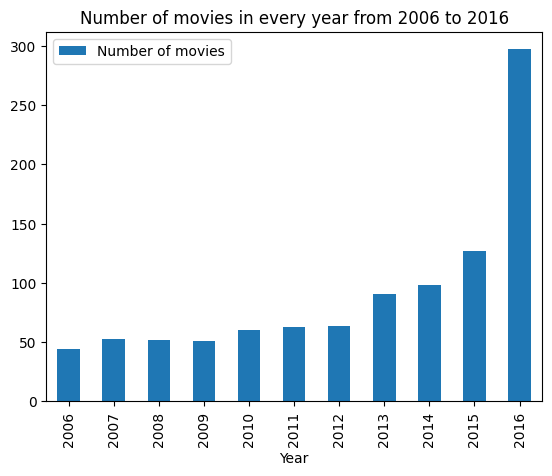

In [18]:
#below are the number of movies in each year
df["value"] = 1
df.groupby("Year")["value"].sum().plot.bar(legend=True,label="Number of movies",title="Number of movies in every year from 2006 to 2016")

<AxesSubplot: title={'center': 'Average rating of movies from 2006 to 2016'}, xlabel='Year'>

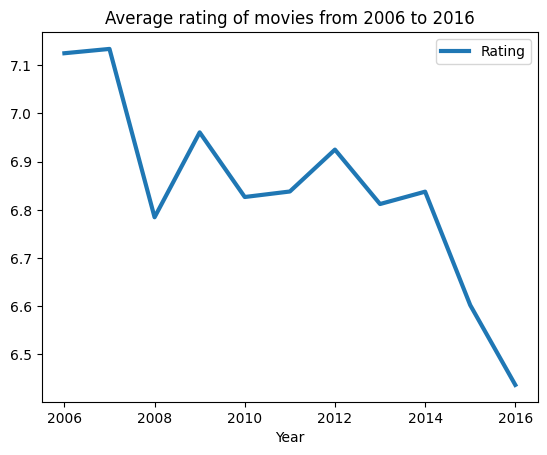

In [19]:
df.groupby("Year")["Rating"].mean().plot.line(legend=True,label="Rating",linewidth = 3.0,title="Average rating of movies from 2006 to 2016")

<AxesSubplot: title={'center': 'Average Revenue of Movies from 2006 to 2016'}, xlabel='Year'>

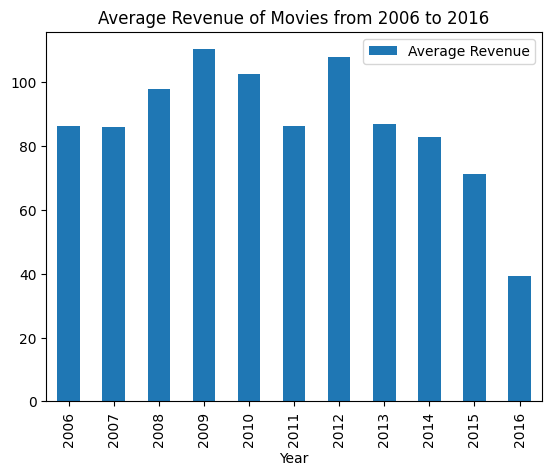

In [20]:
df.groupby("Year")["Revenue (Millions)"].mean().plot.bar(legend=True,label="Average Revenue",title="Average Revenue of Movies from 2006 to 2016")